In [4]:
import numpy as np
import cv2
from pprint import pprint
import ffmpeg
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import imageio

from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

sys.path.append('../')

from precondition import *
from detect_teammates import *

import importlib
importlib.reload(sys.modules['precondition'])
from precondition import *
from detect_teammates import *

In [14]:
with open("../sequences/test_2.seq", mode = 'wb') as f:
    seq.tofile(f)
seq = cut_first_minute(filename)
bp_seq = band_pass_filter_seq(seq)
bp_seq_bgr = 255 * np.repeat(np.expand_dims(bp_seq.astype(np.uint8), axis = 2), 3, axis = 2)
team_blobs = filter_sequence(bp_seq_bgr, find_player_filter, s = 3, threshold = 100)
nightmare_seq = clusters_sequence(team_blobs * 255)

In [13]:
play_sequence(team_blobs.astype(np.uint8) * 255)

0

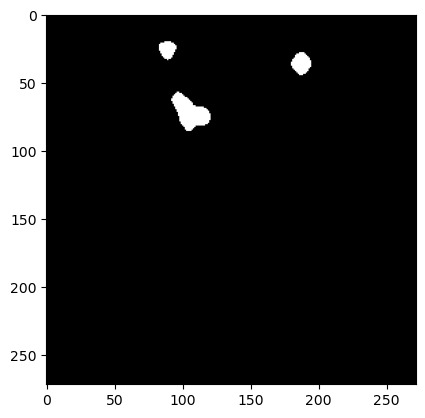

In [24]:
test_frame = team_blobs[:,:,:,400] * 255
plt.imshow(test_frame)
plt.show()

In [19]:
play_sequence(np.diff(team_blobs[:,:,:,:]*255, axis = -1))

0

In [20]:
diff_sum = np.sum(np.diff(team_blobs[:,:,:,:]*255, axis = -1), axis = (0,1,2))

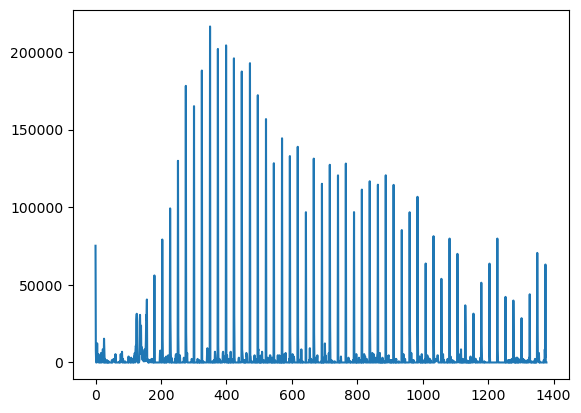

In [21]:
plt.plot(diff_sum)
plt.show()

In [ ]:
def find_connected_areas(frame):
    

In [25]:
import numpy as np
#   __  __   _   _  _____   ___ _____  __      _____  ___ _  __
#  |  \/  | /_\ | |/ / __| |_ _|_   _| \ \    / / _ \| _ \ |/ /
#  | |\/| |/ _ \| ' <| _|   | |  | |    \ \/\/ / (_) |   / ' < 
#  |_|  |_/_/ \_\_|\_\___| |___| |_|     \_/\_/ \___/|_|_\_|\_\
                                                             
T = []
with open('maze_input_1.txt', 'r') as f:
    R, C = map(int, f.readline().split())
    for i in range(R):
        T.append(f.readline())

def sol(R, C, T):
    for r in range(R):
        for c in range(C):
            if T[r][c] == '#':
                continue
            #print("A")
            q = []
            visited = np.zeros((R, C)).astype(bool)
            visited[r, c] = True
            q.append((r, c))
            while q:
                cur_r, cur_c = q.pop()
                for dr, dc in [(+1, 0), (-1, 0), (0, +1), (0, -1)]:
                    next_r = cur_r + dr
                    next_c = cur_c + dc
                    if next_r >= 0 and next_c >= 0 and next_r < R and next_c < C\
                        and T[next_r][next_c] == '.' and visited[next_r, next_c] == False:
                        visited[next_r][next_c] = True
                        q.append((next_r, next_c))

            all_passed = True
            for check_r in range(R):
                for check_c in range(C):
                    if T[check_r][check_c] == '.' and visited[check_r][check_c] == False:
                        all_passed = False

            if all_passed:
                return True
            else:
                return False

if sol(R, C, T):
    print("Yes")
else:
    print("No")

FileNotFoundError: [Errno 2] No such file or directory: 'maze_input_1.txt'